In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
url ='simple_linear_data.csv'

In [ ]:
data = pd.read_csv(url)

In [ ]:
data.head()

,G2,G3
0,30,30
1,25,30
2,40,50
3,70,75
4,50,50


In [ ]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   G2      395 non-null    int64
 1   G3      395 non-null    int64
dtypes: int64(2)
memory usage: 6.3 KB


(395, 2)

In [ ]:
data.insert(0,"1's",1)
data

,1's,G2,G3
0,1,30,30
1,1,25,30
2,1,40,50
3,1,70,75
4,1,50,50
...,...,...,...
390,1,45,45
391,1,80,80
392,1,40,35
393,1,60,50


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1's     395 non-null    int64
 1   G2      395 non-null    int64
 2   G3      395 non-null    int64
dtypes: int64(3)
memory usage: 9.4 KB


In [ ]:
data = data[(data['G3']!=0)|((data['G2']==0)&(data['G3']==0))]
X = data[["1's", 'G2']].values
y = data['G3'].values
X

array([[ 1, 30],
       [ 1, 25],
       [ 1, 40],
       [ 1, 70],
       [ 1, 50],
       [ 1, 75],
       [ 1, 60],
       [ 1, 25],
       [ 1, 90],
       [ 1, 75],
       [ 1, 40],
       [ 1, 60],
       [ 1, 70],
       [ 1, 50],
       [ 1, 80],
       [ 1, 70],
       [ 1, 70],
       [ 1, 50],
       [ 1, 25],
       [ 1, 50],
       [ 1, 70],
       [ 1, 75],
       [ 1, 75],
       [ 1, 65],
       [ 1, 45],
       [ 1, 45],
       [ 1, 60],
       [ 1, 80],
       [ 1, 55],
       [ 1, 60],
       [ 1, 55],
       [ 1, 80],
       [ 1, 80],
       [ 1, 50],
       [ 1, 70],
       [ 1, 35],
       [ 1, 80],
       [ 1, 80],
       [ 1, 60],
       [ 1, 65],
       [ 1, 50],
       [ 1, 60],
       [ 1, 90],
       [ 1, 40],
       [ 1, 50],
       [ 1, 40],
       [ 1, 60],
       [ 1, 95],
       [ 1, 75],
       [ 1, 35],
       [ 1, 65],
       [ 1, 65],
       [ 1, 55],
       [ 1, 50],
       [ 1, 65],
       [ 1, 45],
       [ 1, 75],
       [ 1, 75],
       [ 1, 50

In [ ]:
print(data.iloc[40:56,:])

    1's  G2   G3
40    1  50   55
41    1  60   60
42    1  90   90
43    1  40   55
44    1  50   45
45    1  40   30
46    1  60   55
47    1  95  100
48    1  75   70
49    1  35   35
50    1  65   65
51    1  65   65
52    1  55   50
53    1  50   55
54    1  65   65
55    1  45   50


In [ ]:
X_shape = X.shape
X_type  = X.dtype
y_shape = y.shape
y_type  = y.dtype
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-int64, Shape-(370, 2)
y: Type-int64, Shape-(370,)


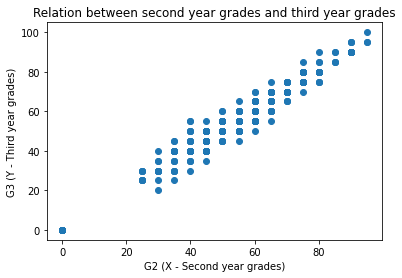

In [ ]:
plt.scatter(X[:,1],y)
plt.title('Relation between second year grades and third year grades')
plt.xlabel('G2 (X - Second year grades)')
plt.ylabel('G3 (Y - Third year grades)')
plt.show()


In [ ]:
def predict(X, weights):
    '''
    weights   : array (2,1) w0 and w1
    X         : array (m,2) x0 (intercept=1) and x1
    
    Returns predicted y using hyothesis linear function defined by given weights
    '''
    ### START CODE HERE ###

    y_pred = np.dot(X,weights)
    ### END CODE HERE ###
    
    assert (y_pred.shape==(X.shape[0],)), 'Wrong implementation of predict function. Check carefully'
    
    return y_pred

In [ ]:
weights = np.random.rand(2,)
predict(X,weights)

(370,)

In [ ]:
def mean_squared_error(y_true, y_pred) : 
    '''
    y_true : (m,1)
    y_pred : (m,1)
    
    Return the mean squared error
    '''
    ### START CODE HERE ###
    loss = np.mean((y_true-y_pred)**2)
    ### END CODE HERE ###
    
    return loss

In [ ]:
def gradient(X, y_true, y_pred):
    '''
    X      : array (m,2)
    y_true : array (m,1)
    y_pred : array (m,1)
    
    Returns a numpy array with gradients. Shape (2,1)
    '''
    # Initialize the gradient vector for w0 (intercept/bias) and w1 respectively
    grad = np.zeros(2,)
    m=X.shape[0]
    ### START CODE HERE ###
    

    grad[0] = np.mean((y_pred - y_true)*X[:, 0])
    grad[1] = np.mean((y_pred-y_true)*X[:,1] )
    
    ### END CODE HERE ###
    
    return grad/(2*m)

In [ ]:
def gradient_descent(X, y, learning_rate=0.01, max_iterations=100):
    '''
    X              : Array (m,2)
    y              : Array (m,1)
    learning_rate  : Learning rate
    max_iterations : Maximum iteratons
    
    Returns : weights vector (2,1)
            : losses (List)
    '''
    # Initialise weights vector of random values of size (2,1)
    weights = np.random.rand(2,)
    # Initialize a list to record all the losses 
    losses  = []
    
    ### START CODE HERE ###
    for i in range(max_iterations):
      y_pred = predict(X,weights)
      err = mean_squared_error(y,y_pred)
      losses.append(err)

      grad = gradient(X,y,y_pred)
      weights[0]-=(learning_rate*grad[0])
      weights[1]-=(learning_rate*grad[1])
      print("Loss-",i+1,losses[i])
    ### END CODE HERE ###
    
    return weights, losses

In [ ]:
optimal_weights, losses = gradient_descent(X, y)

Loss- 1 2667.6951809532466
Loss- 2 2433.0485779748738
Loss- 3 2219.1735932791353
Loss- 4 2024.2314611619336
Loss- 5 1846.5461889524786
Loss- 6 1684.590147858106
Loss- 7 1536.970939350561
Loss- 8 1402.4194241789978
Loss- 9 1279.7788110905203
Loss- 10 1167.994711449769
Loss- 11 1066.1060742532964
Loss- 12 973.2369236035508
Loss- 13 888.5888276063479
Loss- 14 811.4340339440333
Loss- 15 741.1092131082203
Loss- 16 677.0097555002536
Loss- 17 618.5845733693781
Loss- 18 565.3313628988709
Loss- 19 516.7922857064623
Loss- 20 472.55003263124036
Loss- 21 432.224235965898
Loss- 22 395.4681992889006
Loss- 23 361.9659167816774
Loss- 24 331.42935640476367
Loss- 25 303.5959835753022
Loss- 26 278.22650405601377
Loss- 27 255.10280665037743
Loss- 28 234.02608801657988
Loss- 29 214.815143478536
Loss- 30 197.30480913942313
Loss- 31 181.34454190398125
Loss- 32 166.79712520147928
Loss- 33 153.53748928195162
Loss- 34 141.45163594333684
Loss- 35 130.43565844498139
Loss- 36 120.39484818132809
Loss- 37 111.242880

In [ ]:
print("Mean squared error:", losses[-1])

Mean squared error: 17.28390923983014


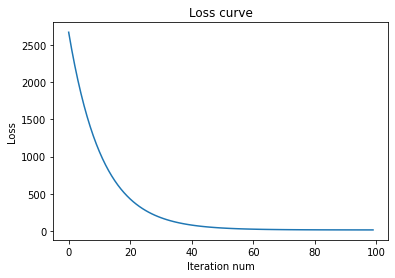

In [ ]:
plt.plot([i for i in range(len(losses))], losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Loss")
plt.show()

In [ ]:
y_pred = predict(X, optimal_weights)

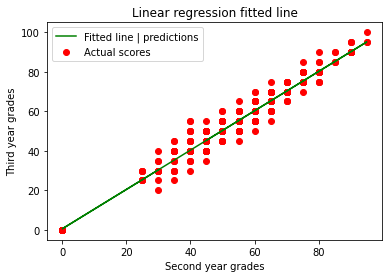

In [ ]:
plt.scatter(X[:,1], y, c='r', label='Actual scores')
plt.plot(X[:,1], y_pred, c='g', label='Fitted line | predictions')
plt.legend()
plt.title("Linear regression fitted line")
plt.xlabel("Second year grades")
plt.ylabel("Third year grades")
plt.show()